# Desafío N°3 - Tipos y estructuras de datos (Parte I)


### 1. Usando la siguiente lista:

lista = ["manzana", "pera", "naranja", "plátano", "kiwi", "uva", "piña","mango", "sandía", "melón"]

a. Imprime el quinto elemento de la lista.
b. Imprime del cuarto al sexto inclusive.
c. Elimina el elemento en la posición 3
d. Agrega dos nuevos elementos a la lista
e. Ordena la lista alfabéticamente.
f. Genera un diccionario usando lista1 como llaves y lista como valores.

lista1 = ["uno", "dos", "tres", "cuatro", "cinco", "seis", "siete","ocho", "nueve", "diez"]


In [1]:
# Creamos la lista
lista = ["manzana", "pera", "naranja", "plátano", "kiwi", "uva", "piña","mango", "sandía", "melón"]
lista

['manzana',
 'pera',
 'naranja',
 'plátano',
 'kiwi',
 'uva',
 'piña',
 'mango',
 'sandía',
 'melón']

In [2]:
# Ejercicio a. Imprime el quinto elemento de la lista.
print(lista[5])

uva


In [3]:
# Ejercicio b. Imprime del cuarto al sexto inclusive. Indicamos rango hasta el "7" para que incluya el sexto elemento
print(lista[4:7])

['kiwi', 'uva', 'piña']


In [4]:
# Ejercicio c. Elimina el elemento en la posición 3
del lista[3]
lista

['manzana',
 'pera',
 'naranja',
 'kiwi',
 'uva',
 'piña',
 'mango',
 'sandía',
 'melón']

In [5]:
# Ejercicio d. Agrega dos nuevos elementos a la lista 
# Para hacerlo más didáctico, pediremos al usuario ingresar frutas y validaremos que estas no existan en la lista previamente

# Primero definiremos lo siguiente para evitar duplicidades en el ingreso de las frutas:

from unidecode import unidecode # Importamos unicode para asegurar que el programa pueda manejar texto con distintos caracteres ejemplo: acentos.
def normalize_input(input_str):# normalize_input al utilizar unicode removerá acentos y convertirá a minuscula los caracteres.
    return unidecode(input_str).lower().strip()

nuevas_frutas = set()  # Utilizaremos el operador "set" para rastrear que las nuevas frutas sean únicas

while len(nuevas_frutas) < 2: # Asignamos el largo 2 para asegurar que el usuario ingrese unicamente solo 2 frutas antes que el loop termine
    fruta = normalize_input(input("Ingrese una nueva fruta: "))
    if fruta not in (normalize_input(f) for f in lista) and fruta not in nuevas_frutas:
        nuevas_frutas.add(fruta)
    elif fruta in nuevas_frutas:
        print(f"La {fruta} ya fue ingresada. Intente con otra fruta.")
    else:
        print(f"La {fruta} ya está contenida en la lista. Intente con otra fruta.")

# Convierte el conjunto en una lista
nuevas_frutas = list(nuevas_frutas)
lista.extend(nuevas_frutas)

# Imprimimos el resultado
print(lista)

Ingrese una nueva fruta: sandia
La sandia ya está contenida en la lista. Intente con otra fruta.
Ingrese una nueva fruta: cherry
Ingrese una nueva fruta: ciruela
['manzana', 'pera', 'naranja', 'kiwi', 'uva', 'piña', 'mango', 'sandía', 'melón', 'cherry', 'ciruela']


In [6]:
# Ejercicio e. Ordena la lista alfabéticamente.
lista.sort()
lista

['cherry',
 'ciruela',
 'kiwi',
 'mango',
 'manzana',
 'melón',
 'naranja',
 'pera',
 'piña',
 'sandía',
 'uva']

In [7]:
# Ejercicio f. Genera un diccionario usando lista1 como llaves y lista como valores.

# Creamos la lista1
lista1 = ["uno", "dos", "tres", "cuatro", "cinco", "seis", "siete","ocho", "nueve", "diez"]

In [8]:
diccionario_frutas = [] # Creamos un diccionario vacío el cual será utilizado para parear lista y lista1
unique_id_counter = 0  # Debido a que puede ocurrir que el largo de lista < largo de lista1, generamos un código que permita generar ID incremental para los siguientes elementos que no tengan un par en "lista". Comenzando con un id desde cero.

max_len = max(len(lista1), len(lista)) # Calculamos el largo máximo entre lista y lista1, lo cual servirá para la iteración siguiente:

for i in range(max_len):
    try:
        tupla = (lista1[i], lista[i])
    except IndexError: # Utilizamos IndexError para manejar posibles errores de indexación esto porque ambas listas pueden no tener el mismo largo
        if len(lista1) > len(lista):
            tupla = (lista1[i], f"Sin fruta asociada") # Si lista > lista1 indicaremos que no hay fruta asociada con la cual parear el elemento de "lista"
        elif len(lista1) < len(lista): # Si el largo de "lista" < al largo de "lista1" generamos ID incrementales
            tupla = (f"id_{unique_id_counter}", lista[i])
        unique_id_counter += 1  # Incrementamos el ID a medida que se agregan elementos en lista1
    diccionario_frutas.append(tupla)

# Resultado
print(diccionario_frutas)


[('uno', 'cherry'), ('dos', 'ciruela'), ('tres', 'kiwi'), ('cuatro', 'mango'), ('cinco', 'manzana'), ('seis', 'melón'), ('siete', 'naranja'), ('ocho', 'pera'), ('nueve', 'piña'), ('diez', 'sandía'), ('id_0', 'uva')]


In [14]:
# Podemos consultar algún elemento del diccionario, por ejemplo, el elemento "3"
value = (diccionario_frutas[3])
value

('cuatro', 'mango')

### 2. Fabricación de cerveza artesanal

El LIC y el LSC son calculados utilizando la media y la desviación estándar de los datos del proceso. La idea es que la mayoría de los datos del proceso se encuentren dentro de los límites de control (entre el LIC y el LSC), y si un dato cae fuera de estos límites, se puede considerar que el proceso está fuera de control y se requiere una acción correctiva para investigar y
corregir la causa de la variación. El valor del LIC se calcula como la media menos tres veces la desviación estándar, y el valor del LSC se calcula como la media más tres veces la desviación estándar. Estos límites representan el rango en el que la mayoría de los datos del proceso deberían estar.

Para poder asegurar de que la cantidad de alcohol en cada lote de cerveza sea consistente, debes medir el porcentaje de alcohol de cada lote y registrar los datos en una hoja de cálculo. Esta información ya ha sido recolectada a partir de 1.000 lotes de cerveza y se encuentra en el archivo alcohol_cerveza.csv.

El objetivo del ejercicio es calcular la media, la desviación estándar, el LIC y el LSC del porcentaje de alcohol y guardarlos en variables.

Para asegurarte de que los lotes de cerveza se estén elaborando de forma consistente y que el nivel de alcohol sea el adecuado, una vez calculadas las medidas anteriores, indicar cuáles valores quedarían fuera de los límites de control y cuántos son.

Como guía puedes seguir estos pasos:

● Importa la librería NumPy.
● Carga los datos del archivo csv en una variable llamada array, usando np.loadtxt(“alcohol_cerveza.csv”) y modifica los parámetros necesarios para leer bien el archivo.
● Calcula la media de los datos utilizando la función mean de NumPy y almacena el resultado en una variable llamada media.
● Calcula la desviación estándar de los datos utilizando la función std de NumPy y almacena el resultado en una variable llamada desviacion.
● Calcula el límite inferior de control (LIC) utilizando la fórmula: media - (3 * desviacion) y almacena el resultado en una variable llamada lic.
● Calcula el límite superior de control (LSC) utilizando la fórmula: media + (3 * desviacion) y almacena el resultado en una variable llamada lsc.
● Imprime los resultados de la media, la desviación estándar, el LIC y el LSC.
● Filtra el array utilizando np.logical_or(condicion1, condicion2) para obtener los valores fuera de los límites de control.


In [15]:
import numpy as np

In [16]:
# Carga del archivo alcohol cerveza (corregido)
data = np.loadtxt("alcohol_cerveza_corregido.csv")

print("Datos cargados:")
print(data)

Datos cargados:
[5.06 4.29 4.84 4.93 5.09 4.95 4.89 5.01 4.17 4.46 5.07 5.19 4.82 5.07
 4.54 4.99 5.06 4.92 4.61 5.14 5.31 4.74 5.34 4.78 4.09 5.27 5.04 5.04
 5.21 5.04 4.73 5.49 4.98 4.96 4.92 5.16 4.91 5.04 4.93 5.03 5.01 5.01
 4.82 4.82 4.94 5.09 4.69 5.14 5.18 5.17 4.98 5.79 4.55 4.57 5.47 5.07
 5.04 4.87 4.98 4.86 5.02 5.11 5.33 5.19 4.99 4.84 5.16 5.22 5.03 4.85
 5.   4.86 5.05 5.04 5.17 4.48 5.01 5.31 4.86 5.27 5.12 5.31 4.62 4.65
 4.95 4.86 4.37 5.11 4.73 5.38 5.25 4.86 5.14 5.48 5.07 4.62 5.28 5.13
 5.23 4.93 5.44 4.44 5.08 5.   4.45 4.62 4.88 5.02 5.38 4.88 4.09 5.22
 5.52 4.71 5.04 5.37 4.73 5.14 4.28 4.69 4.96 5.19 4.71 5.68 4.39 5.16
 4.53 5.26 4.82 5.05 4.07 4.61 5.04 4.04 5.12 4.77 5.39 5.57 4.34 5.04
 4.86 4.88 5.44 4.92 5.18 5.13 5.42 4.66 4.78 5.03 4.88 5.22 5.36 4.54
 4.09 4.67 4.97 4.95 5.38 5.21 5.08 4.91 4.79 4.96 4.93 5.05 4.89 5.07
 4.84 5.19 5.21 4.83 5.27 5.08 5.11 4.93 5.31 4.05 5.18 4.93 4.92 5.02
 4.66 5.21 5.19 5.01 4.87 5.09 4.87 4.86 4.54 5.   4.81 5.16 

In [17]:
# Calculo de la media
media = np.mean(data)
print (media)

4.972899999999999


In [18]:
# Calculo de la desviación estándar
desviacion = np.std(data)
print(desviacion)

0.3418008045631256


In [19]:
# Calculo del límite inferior
lic = media - (3 * desviacion)
print (lic)

3.9474975863106225


In [20]:
# Calculo del limite superior
lsc = media + (3 * desviacion)
print (lsc)

5.998302413689376


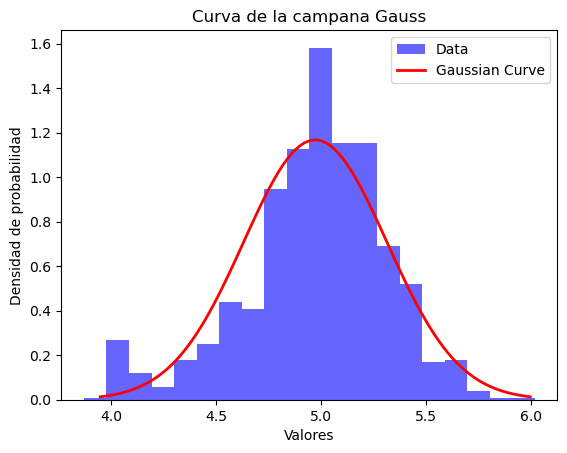

In [21]:
# De forma adicional al ejercicio, podemos mostrar estos resultados en una campana de Gauss para lo cual importamos la librería matplotlib 

import matplotlib.pyplot as plt
from scipy.stats import norm

# Creamos el rango para el eje x del gráfico
x = np.linspace(lic, lsc, 100)

# Calculamos la función de densidad de probabilidad(pdf) para la distribución Gaussiana
pdf = norm.pdf(x, media, desviacion)

# Desplegamos los datos como un histograma
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Data')

# Desplegamos la campana de Gauss como una curva
plt.plot(x, pdf, 'r', linewidth=2, label='Gaussian Curve')

# Agregamos etiquetas y leyendas
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Curva de la campana Gauss')
plt.legend()

# Mostramos el gráfico
plt.show()

In [25]:
# Finalmente, buscaremos dentro del data set todos aquellos valores fuera del rango de control (lic - lsc)
fuera_de_rango = np.logical_or(data < lic, data > lsc)
valores_fuera_de_rango = data[fuera_de_rango]

print("Valores fuera de rango [lic, lsc]:")
print(valores_fuera_de_rango)

Valores fuera de rango [lic, lsc]:
[3.87 6.02]
